In [1]:
## This code is used for localization task on the small table
import os
import scipy.io
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft

# machine learning parts
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
def read_mat_files(data_path):
    # List to hold all data
    all_data = []
    all_data_name = []
    # Iterate over each file in the directory
    for file in os.listdir(data_path):
        if file.endswith('.mat'):
            file_path = os.path.join(data_path, file)

            # Load the .mat file
            data = scipy.io.loadmat(file_path)

            # Append the data to the list
            all_data.append(data)
            all_data_name.append(file)

    return all_data, all_data_name

# Specify the data path
data_path = '../../weight_datas/multi_obj_piezo'

# Call the function to read data
mat_data, mat_data_name = read_mat_files(data_path)

In [3]:
# Function to chop the signal into 1-second windows and apply FFT
def process_signal(signal, window_size):
    # Calculate the number of windows
    signal_length = len(signal)
    num_windows = signal_length // window_size
    
    # Initialize an empty list to store FFT results
    fft_results = []
    
    # Iterate through each window
    for i in range(num_windows):
        # Extract the window from the signal
        start = i * window_size
        end = start + window_size
        window = signal[start:end]
        
        # Apply FFT to the window
        fft_result = fft(window)
        
        # Append the FFT result to the list
        fft_results.append(fft_result)
    
    return fft_results
weights = [0, 100, 200, 300]
loc = 3
sen_num = 1
fs = 25600
window_size = fs
labels_list = []
fft_results_all = []
for w in weights:
    if w ==0:
        file_name = 'empty.mat'
    else:
        file_name = str(w) + 'g_loc_' + str(loc) + '.mat'
    
    idx = np.where(np.array(mat_data_name) == file_name)[0][0]
    data = mat_data[idx]['data']
    time = np.arange(0, len(data)/fs, 1/fs)
    signal = data[:, sen_num] - 2.5  # Assuming sen_num is defined elsewhere
    fft_results = process_signal(signal, window_size)
    fft_results_all.extend(fft_results)
    # For each window's FFT result, add the label (w/100)
    # Here, np.ones(len(fft_results)) creates an array of ones with the same length as fft_results
    # This is multiplied by w/100 to create the labels for this particular weight
    current_labels = w/100 * np.ones(len(fft_results))
    
    # Append the current labels to the labels list
    labels_list.extend(current_labels)

# Convert the labels list to a NumPy array
labels = np.array(labels_list)


In [4]:
fft_array = np.array(fft_results_all)
labels.shape

(125,)

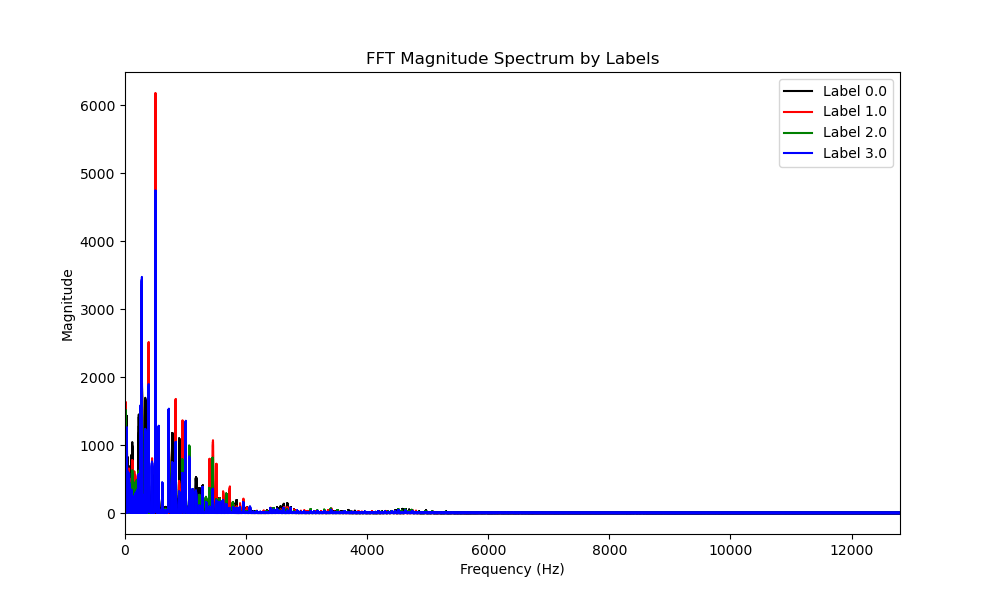

In [5]:
# Define your frequency axis based on the sampling frequency and the number of points in FFT
fs = 25600  # Sampling frequency
n = fft_array.shape[1]  # Length of the FFT signal
freq = np.linspace(0, fs, n)

# Colors for different labels
colors = {0: 'k', 1: 'r', 2: 'g', 3: 'b'}

# Plotting
plt.figure(figsize=(10, 6))

for i in range(len(fft_array)):
    label = labels[i]
    if label in colors:  # Check if the label is one of the specified labels
        plt.plot(freq, np.abs(fft_array[i]), color=colors[label], label=f'Label {label}')

# To avoid duplicate labels in the legend
handles, labels_plt = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels_plt, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude Spectrum by Labels')
plt.xlim(0, fs/2)  # Typically, we only need to plot up to Nyquist frequency
plt.show()

35


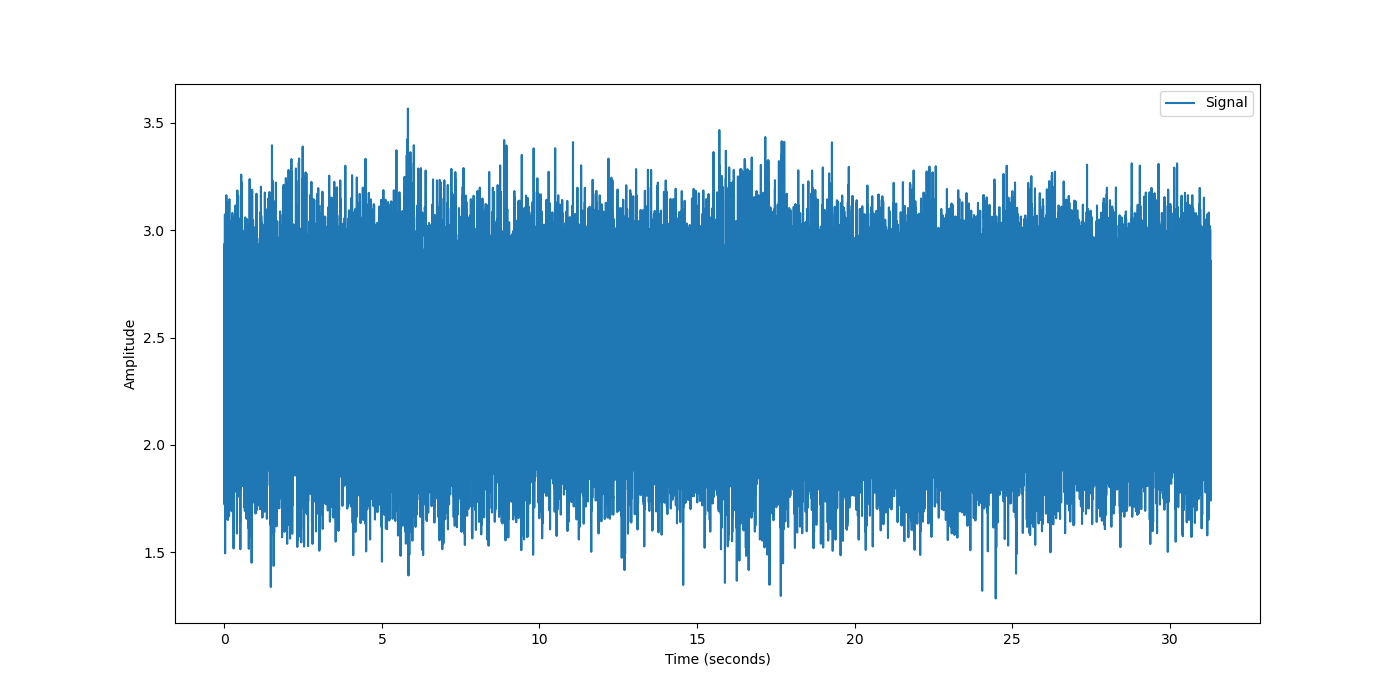

In [43]:
# Just look into the signals and plot it
fs = 25600
file_name = "100g_loc_1.mat"
idx = np.where(np.array(mat_data_name) == file_name)[0][0]
print(idx)
data = mat_data[idx]['data']
time = np.arange(0, len(data)/fs, 1/fs)
data.shape
# Plotting the signal and the detected peaks
plt.figure(figsize=(14, 7))
plt.plot(time, data[:,1], label='Signal')
# plt.plot(time[filtered_peaks], signal[filtered_peaks], 'x', label='Detected Peaks')
# plt.title(f'Signal with Detected Peaks with weight {w}')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [40]:
feats = np.abs(fft_array[:,1:500])
y = labels - 1  # Ensure this is binary or multi-class labels suitable for classification

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feats, y, test_size=0.2, random_state=42)

# Initialize the classifier
model = SVC()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [44]:
# Classification for locations
# Function to chop the signal into 1-second windows and apply FFT
def process_signal(signal, window_size):
    # Calculate the number of windows
    signal_length = len(signal)
    num_windows = signal_length // window_size
    
    # Initialize an empty list to store FFT results
    fft_results = []
    
    # Iterate through each window
    for i in range(num_windows):
        # Extract the window from the signal
        start = i * window_size
        end = start + window_size
        window = signal[start:end]
        
        # Apply FFT to the window
        fft_result = fft(window)
        
        # Append the FFT result to the list
        fft_results.append(fft_result)
    
    return fft_results
weights = [100, 200, 300]
w = 100
locs = [1,2,3,4,6,7,8,9]
# loc = 3
sen_num = 1
fs = 25600
window_size = fs
labels_list = []
fft_results_all = []
for loc in locs:
    file_name = str(w) + 'g_loc_' + str(loc) + '.mat'
    idx = np.where(np.array(mat_data_name) == file_name)[0][0]
    data = mat_data[idx]['data']
    time = np.arange(0, len(data)/fs, 1/fs)
    signal = data[:, sen_num] - 2.5  # Assuming sen_num is defined elsewhere
    fft_results = process_signal(signal, window_size)
    fft_results_all.extend(fft_results)
    # For each window's FFT result, add the label (w/100)
    # Here, np.ones(len(fft_results)) creates an array of ones with the same length as fft_results
    # This is multiplied by w/100 to create the labels for this particular weight
    current_labels = loc * np.ones(len(fft_results))
    
    # Append the current labels to the labels list
    labels_list.extend(current_labels)

# Convert the labels list to a NumPy array
labels = np.array(labels_list)
fft_array = np.array(fft_results_all)


In [45]:
feats = np.abs(fft_array[:,1:500])
# Define the mapping from original labels to new labels
label_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 6: 4, 7: 5, 8: 6, 9: 7}

# Apply the mapping to the labels array
y = np.vectorize(label_mapping.get)(labels)


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feats, y, test_size=0.2, random_state=42)

# Initialize the classifier
model = SVC()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9807692307692307


In [73]:
file_name = '100g_loc_3_6.mat'
idx = np.where(np.array(mat_data_name) == file_name)[0][0]
data = mat_data[idx]['data']
time = np.arange(0, len(data)/fs, 1/fs)
signal = data[:, sen_num] - 2.5  # Assuming sen_num is defined elsewhere
fft_results_12 = process_signal(signal, window_size)

In [74]:
a  = np.abs(np.array(fft_results_12))
model.predict(a[:,1:500])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# get the average of the empty fft_arrays
idx_0 = np.where(labels ==0)[0]
offset = np.mean(np.abs(fft_array[idx_0, 1:500]), axis = 0)

(52, 499)